## Predict Tinder Matches

We are going to make a recommender algorithm that recommends profiles to people based on their similar interests so we will aim to predict the profiles to the user such that the user finds it most interesting out of all and tries to connect with them

Reference: https://www.geeksforgeeks.org/predict-tinder-matches-with-machine-learning/

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
tinder_data = pd.read_csv("../data/tinder_data.csv")

In [6]:
type(tinder_data)

pandas.core.frame.DataFrame

In [3]:
tinder_data.head()

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,same state
1,fffe3200,Travis Young,26,single,m,gay,socially,never,68.0,other,"pleasant hill, california",likes dogs,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",anywhere
2,fffe3300,Agnes Smith,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,"oakland, california",has dogs and likes cats,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,same city
3,fffe3400,Salvador Klaver,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,same city
4,fffe3500,Elana Sewell,22,single,f,bisexual,often,sometimes,68.0,other,"oakland, california",likes dogs and likes cats,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,same city


In [4]:
tinder_data.shape

(2001, 20)

In [5]:
tinder_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2001 entries, 0 to 2000
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              2001 non-null   object 
 1   username             2001 non-null   object 
 2   age                  2001 non-null   int64  
 3   status               2001 non-null   object 
 4   sex                  2001 non-null   object 
 5   orientation          2001 non-null   object 
 6   drinks               2001 non-null   object 
 7   drugs                2001 non-null   object 
 8   height               2001 non-null   float64
 9   job                  2001 non-null   object 
 10  location             2001 non-null   object 
 11  pets                 2001 non-null   object 
 12  smokes               2001 non-null   object 
 13  language             2001 non-null   object 
 14  new_languages        2001 non-null   object 
 15  body_profile         2001 non-null   o

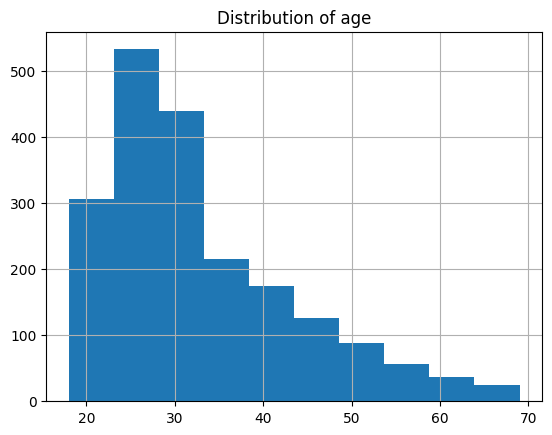

In [6]:
# get to the know the data
# distribution of age

tinder_data.age.hist()
plt.title("Distribution of age");


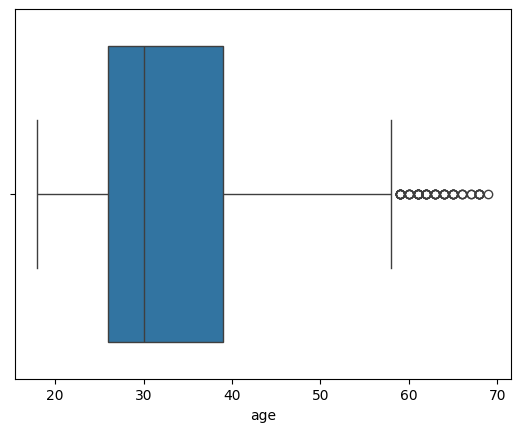

In [7]:
sns.boxplot(x=tinder_data.age);

# ages above 60 are considered outliers - we may consider filtering based on age

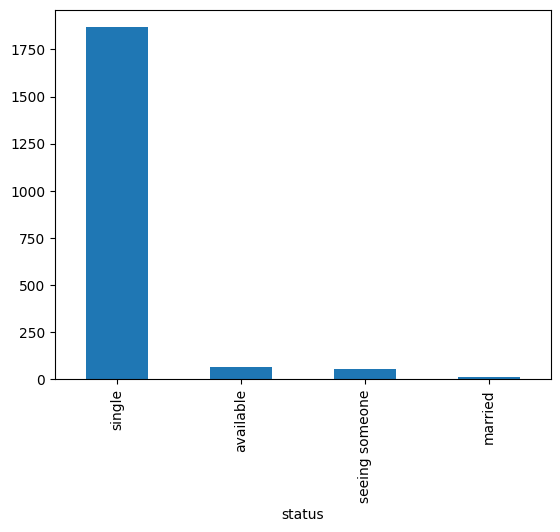

In [9]:
# distribution of status

tinder_data.status.value_counts().plot(kind='bar');

In [9]:
tinder_data.sex.value_counts(normalize=True)

# 56% of users are male and 43% are female. 

sex
m    0.569215
f    0.430785
Name: proportion, dtype: float64

In [10]:
tinder_data.orientation.value_counts(normalize=True)

# 86% of users are straight. We might want to consider only making predictions for those that identify as straight for this iteraion

orientation
straight    0.867566
gay         0.076462
bisexual    0.055972
Name: proportion, dtype: float64

In [11]:
tinder_data.location.value_counts(normalize=True).nlargest(20)

# looks like most of the users are based in California, with 45%
# a feature we may consider dropping from building our model

location
san francisco, california    0.455272
oakland, california          0.124938
berkeley, california         0.072964
san mateo, california        0.027986
palo alto, california        0.022489
alameda, california          0.017491
san rafael, california       0.017491
san leandro, california      0.016492
redwood city, california     0.013993
daly city, california        0.013493
emeryville, california       0.013493
walnut creek, california     0.011994
hayward, california          0.010495
pacifica, california         0.008996
el cerrito, california       0.008496
menlo park, california       0.007996
benicia, california          0.007496
richmond, california         0.007496
mountain view, california    0.007496
burlingame, california       0.007496
Name: proportion, dtype: float64

In [12]:
# location preference - we would need to take this account when making our predictions

tinder_data.location_preference.value_counts()

location_preference
same city     1169
same state     495
anywhere       337
Name: count, dtype: int64

In [13]:

tinder_data.language.value_counts(normalize=True).nlargest(20)

# looks like most users can communicate in English

language
english                                                0.272364
english (fluently)                                     0.142429
english (fluently), spanish (okay)                     0.042979
english (fluently), spanish (poorly)                   0.042979
english (fluently), spanish (fluently)                 0.021989
english (fluently), french (poorly)                    0.014493
english, spanish (poorly)                              0.012494
english, spanish (okay)                                0.011994
english, spanish                                       0.010995
english (fluently), chinese (fluently)                 0.009495
english (fluently), french (okay)                      0.008496
english (fluently), chinese (okay)                     0.007996
english (okay)                                         0.006997
english (fluently), german (poorly)                    0.005997
english (poorly)                                       0.005997
english (fluently), spanish (ok

In [10]:
# view the bios of same of the users
# question: how could we work with this data?

tinder_data.bio[5]

"my self-summary..well i'm not very good at this, so lets give it a try..i can be really shy but outgoing once i warm up to the person or situation. would say that life is good..it has its ups and downs but that's what makes life interesting. i love to have fun but also love just relaxing..i'm a little clumsy but i always put all of it. i enjoy listening to all sorts of music and watching movies...to be continued"

In [15]:
tinder_data.bio[5]

"my self-summary..well i'm not very good at this, so lets give it a try..i can be really shy but outgoing once i warm up to the person or situation. would say that life is good..it has its ups and downs but that's what makes life interesting. i love to have fun but also love just relaxing..i'm a little clumsy but i always put all of it. i enjoy listening to all sorts of music and watching movies...to be continued"

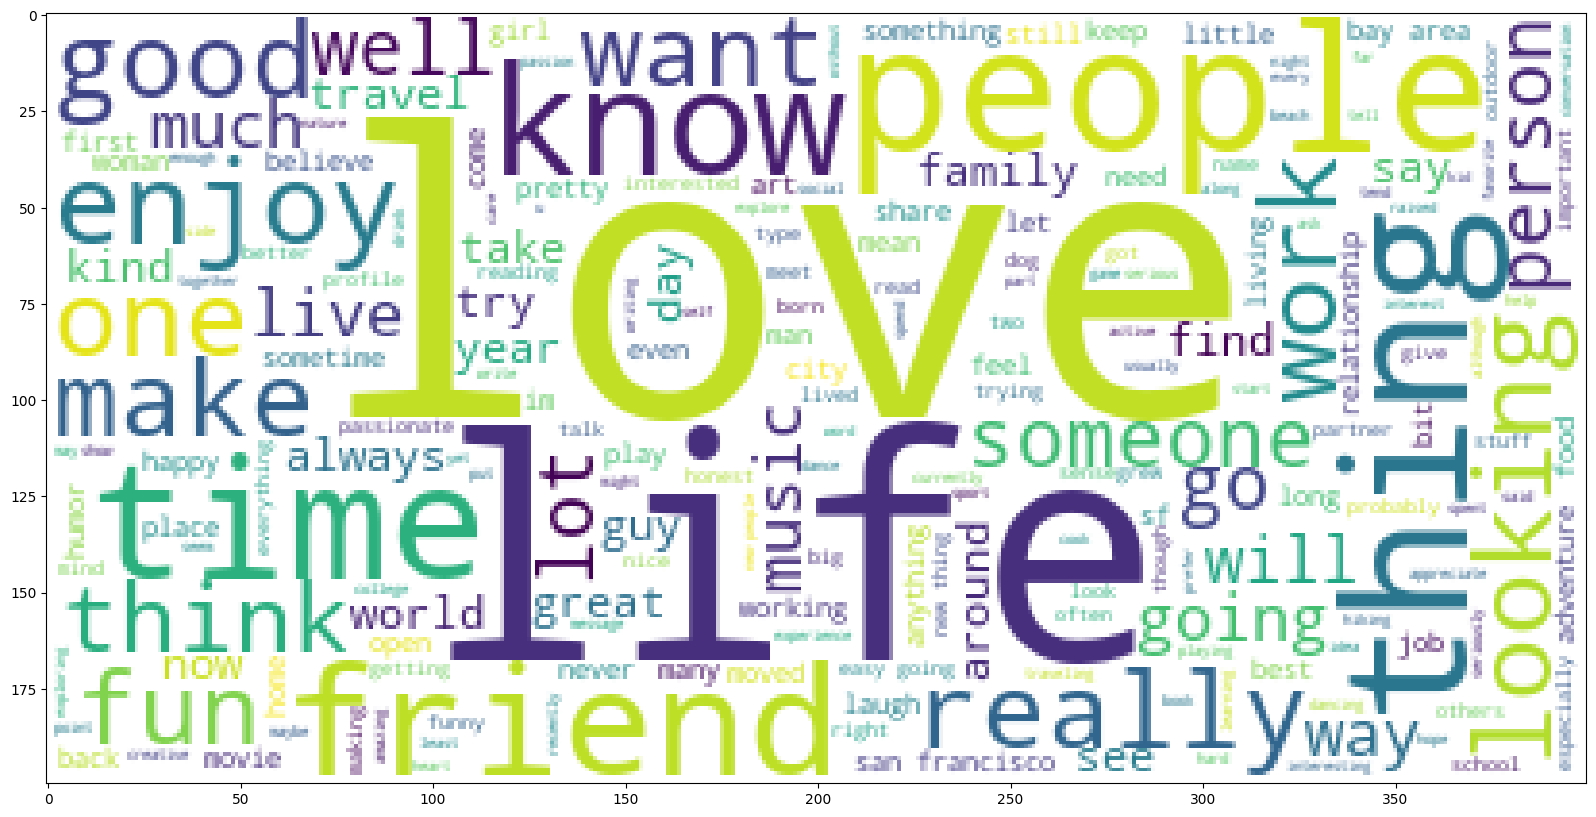

In [52]:
# what sort of words are appearing?

import re
from wordcloud import WordCloud

# Remove punctuation
tinder_data['bio_proc'] = \
tinder_data['bio'].map(lambda x: re.sub('[,.!?]', '', x))

# Convert all the words to lowercase
tinder_data['bio_proc'] = \
tinder_data['bio_proc'].map(lambda x: x.lower())


# Join the different processed bios together.
long_string = ','.join(list(tinder_data['bio_proc'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, 
contour_color='steelblue')# Generate a word cloud
wordcloud.generate(long_string)# Visualize the word cloud
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.show();

In [16]:
# check for missing data

tinder_data.isnull().sum()

user_id                0
username               0
age                    0
status                 0
sex                    0
orientation            0
drinks                 0
drugs                  0
height                 0
job                    0
location               0
pets                   0
smokes                 0
language               0
new_languages          0
body_profile           0
education_level        0
dropped_out            0
bio                    0
location_preference    0
dtype: int64

In [17]:
# check for duplicate data

tinder_data.duplicated().sum()

0

**Summary**
- No missing data or duplicate data.
- We have 17 features with the data type object that need removing, encoding or engineering. 
- Features such as the id of the user and user name do not contribute to the matching algorithm, as each user has a unique name/id so will remove them.
- The data also includes different sexual orientations and availability. Would make sense to remove them from this model and in future build another model for different sexual orientations.
- Single and available could be the same category - will fix this later.

In [18]:
# identify all the features that need encoding

list(tinder_data.select_dtypes('object').columns)

['user_id',
 'username',
 'status',
 'sex',
 'orientation',
 'drinks',
 'drugs',
 'job',
 'location',
 'pets',
 'smokes',
 'language',
 'new_languages',
 'body_profile',
 'dropped_out',
 'bio',
 'location_preference']

In [19]:
# set user id to be the index and drop user name

tinder_data_cleaned = tinder_data.drop(['username'], axis=1)
tinder_data_cleaned = tinder_data_cleaned.set_index('user_id')

tinder_data_cleaned.head()

,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,location_preference
user_id,,,,,,,,,,,,,,,,,,
fffe3100,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,same state
fffe3200,26,single,m,gay,socially,never,68.0,other,"pleasant hill, california",likes dogs,no,"english (fluently), tagalog (okay), french (po...",interested,fit,3.0,no,"i'm a straightforward, genuine, fun loving (i'...",anywhere
fffe3300,20,seeing someone,f,bisexual,socially,sometimes,69.0,other,"oakland, california",has dogs and likes cats,sometimes,"english (fluently), sign language (poorly), fr...",interested,fit,2.0,no,mmmmm yummy tacosss. yoga is where it's at. i ...,same city
fffe3400,27,single,m,bisexual,socially,sometimes,68.0,computer / hardware / software,"daly city, california",likes dogs and likes cats,no,english,not interested,average,3.0,no,i'm a stealth geek. that special mix of techni...,same city
fffe3500,22,single,f,bisexual,often,sometimes,68.0,other,"oakland, california",likes dogs and likes cats,yes,english,not interested,average,2.0,yes,with the whisper of the wind i was weaved into...,same city


In [20]:
list(tinder_data_cleaned.select_dtypes('object').columns)

['status',
 'sex',
 'orientation',
 'drinks',
 'drugs',
 'job',
 'location',
 'pets',
 'smokes',
 'language',
 'new_languages',
 'body_profile',
 'dropped_out',
 'bio',
 'location_preference']

In [21]:
# distribution of their status 

tinder_data_cleaned.status.value_counts(normalize=True)

# let's assume that our user profiles are looking for single and available people
# also the percentage of seeing someone and married is so small - we can either remove them or we can weight them lower then encoding


status
single            0.933033
available         0.032984
seeing someone    0.026987
married           0.006997
Name: proportion, dtype: float64

In [22]:
status_type_strength = { 
    'single': 2.0, 
    'available': 2.0, 
    'seeing someone': 1.0, 
    'married': 1.0
} 

tinder_data_cleaned['status'] = tinder_data_cleaned['status'].apply(lambda x: status_type_strength[x]) 

In [23]:
tinder_data_cleaned['status'].value_counts()

status
2.0    1933
1.0      68
Name: count, dtype: int64

In [24]:
tinder_data_cleaned['sex'].value_counts()

sex
m    1139
f     862
Name: count, dtype: int64

In [25]:
# convert to boolean - 1 and 0
replace_dict = {'f':0, 'm':1}


tinder_data_cleaned['sex'] = tinder_data_cleaned['sex'].map(replace_dict)

In [48]:
tinder_data_cleaned['sex'].value_counts()

sex
1    998
0    738
Name: count, dtype: int64

In [27]:
tinder_data_cleaned.orientation.value_counts()

# in this case, would say makes sense to have a separate model who do not identify as straight, so removing them from this iteration

orientation
straight    1736
gay          153
bisexual     112
Name: count, dtype: int64

In [28]:
print(tinder_data_cleaned.shape)
tinder_data_cleaned = tinder_data_cleaned[tinder_data_cleaned.orientation == 'straight']
print(tinder_data_cleaned.shape)

(2001, 18)
(1736, 18)


In [29]:
tinder_data_cleaned.drinks.value_counts()

drinks
socially       1224
rarely          213
often           145
not at all      132
very often       13
desperately       9
Name: count, dtype: int64

In [30]:
pd.get_dummies(tinder_data_cleaned.drinks, prefix='drinks')
pd.concat([tinder_data_cleaned, pd.get_dummies(tinder_data_cleaned.drinks, prefix='drinks')], axis=1)

,age,status,sex,orientation,drinks,drugs,height,job,location,pets,...,education_level,dropped_out,bio,location_preference,drinks_desperately,drinks_not at all,drinks_often,drinks_rarely,drinks_socially,drinks_very often
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3800,44,2.0,1,straight,socially,never,69.0,banking / financial / real estate,"oakland, california",likes dogs and likes cats,...,3.0,no,this is me. ok ok more to it than that but i c...,same city,False,False,False,False,True,False
fffe31003000,28,2.0,1,straight,very often,sometimes,62.0,other,"san francisco, california",dislikes dogs and dislikes cats,...,4.0,no,i work and i play. hard. all day. everyday. i ...,same state,False,False,False,False,False,True
fffe31003100,53,2.0,0,straight,socially,never,68.0,political / government,"san rafael, california",has cats,...,3.0,no,"i am a easy-going fun loving, compassionate pe...",same city,False,False,False,False,True,False
fffe31003200,24,2.0,0,straight,socially,never,65.0,medicine / health,"san francisco, california",likes dogs and likes cats,...,3.0,no,"so...there is much to say... for now, i'm a st...",anywhere,False,False,False,False,True,False
fffe31003300,29,2.0,1,straight,socially,never,73.0,education / academia,"san francisco, california",likes dogs and dislikes cats,...,3.0,no,i moved to san francisco two years ago after l...,same city,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390039003600,46,2.0,1,straight,socially,never,69.0,sales / marketing / biz dev,"san mateo, california",likes dogs and has cats,...,3.0,no,i see myself as a pretty easy going and straig...,same state,False,False,False,False,True,False
fffe3100390039003700,24,2.0,1,straight,socially,never,69.0,student,"oakland, california",likes dogs and likes cats,...,2.0,no,i grew up playing instruments and singing and ...,same city,False,False,False,False,True,False
fffe3100390039003900,28,2.0,1,straight,rarely,never,71.0,sales / marketing / biz dev,"pleasant hill, california",likes dogs,...,3.0,no,i've spent the last 10 years working in the ou...,anywhere,False,False,False,True,False,False


In [31]:
# two ways of encoding - we can either say socially should get a heigher weighting than desprately, or we can one hot encode

def one_hot(df, categorical_cols):
    """
    @param df pandas DataFrame
    @param cols a list of columns to encode 
    @return a DataFrame with one-hot encoding
    """
    
    for c in categorical_cols:
        dummies = pd.get_dummies(df[c], prefix=c)
        df = pd.concat([df, dummies], axis=1)
        df.drop(c, axis = 1, inplace = True)
    
    return df


In [32]:
tinder_data_cleaned.drugs.value_counts()

drugs
never        1413
sometimes     312
often          11
Name: count, dtype: int64

In [33]:
tinder_data_cleaned.job.value_counts(normalize=True)

job
other                                0.140553
student                              0.097926
science / tech / engineering         0.088710
artistic / musical / writer          0.084677
sales / marketing / biz dev          0.082373
computer / hardware / software       0.080645
medicine / health                    0.074309
education / academia                 0.067972
executive / management               0.047235
banking / financial / real estate    0.043203
entertainment / media                0.036290
law / legal services                 0.029378
construction / craftsmanship         0.028802
hospitality / travel                 0.021889
political / government               0.018433
clerical / administrative            0.014977
transportation                       0.010945
retired                              0.009793
rather not say                       0.009793
unemployed                           0.008065
military                             0.004032
Name: proportion, dtype: float

In [34]:
tinder_data_cleaned.head()

,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,location_preference
user_id,,,,,,,,,,,,,,,,,,
fffe3800,44,2.0,1,straight,socially,never,69.0,banking / financial / real estate,"oakland, california",likes dogs and likes cats,no,english (fluently),not interested,a little extra,3.0,no,this is me. ok ok more to it than that but i c...,same city
fffe31003000,28,2.0,1,straight,very often,sometimes,62.0,other,"san francisco, california",dislikes dogs and dislikes cats,when drinking,"english, french, german, chinese, sign language",not interested,used up,4.0,no,i work and i play. hard. all day. everyday. i ...,same state
fffe31003100,53,2.0,0,straight,socially,never,68.0,political / government,"san rafael, california",has cats,no,english (fluently),not interested,fit,3.0,no,"i am a easy-going fun loving, compassionate pe...",same city
fffe31003200,24,2.0,0,straight,socially,never,65.0,medicine / health,"san francisco, california",likes dogs and likes cats,no,"english (fluently), spanish (okay), french (po...",interested,average,3.0,no,"so...there is much to say... for now, i'm a st...",anywhere
fffe31003300,29,2.0,1,straight,socially,never,73.0,education / academia,"san francisco, california",likes dogs and dislikes cats,no,english,not interested,average,3.0,no,i moved to san francisco two years ago after l...,same city


In [35]:
tinder_data.pets.value_counts()

pets
likes dogs and likes cats          743
likes dogs                         303
likes dogs and has cats            229
has dogs                           184
has dogs and likes cats            148
likes dogs and dislikes cats       121
has dogs and has cats               87
has cats                            63
likes cats                          59
has dogs and dislikes cats          24
dislikes dogs and dislikes cats     17
dislikes dogs and likes cats         9
dislikes cats                        5
dislikes dogs                        5
dislikes dogs and has cats           4
Name: count, dtype: int64

In [66]:
# create new features
# likes dog
# likes cat

tinder_data_cleaned['likes_dog'] = 0

tinder_data_cleaned.loc[tinder_data_cleaned['pets'].str.contains('likes dogs'), 'likes_dog'] = 1

In [67]:
tinder_data_cleaned['likes_dog'].value_counts()

likes_dog
1    1229
0     507
Name: count, dtype: int64

In [68]:
tinder_data_cleaned['likes_cats'] = 0

tinder_data_cleaned.loc[tinder_data_cleaned['pets'].str.contains('likes cats'), 'likes_cats'] = 1

In [69]:
tinder_data_cleaned['likes_cats'].value_counts()

likes_cats
1    980
0    756
Name: count, dtype: int64

In [77]:
tinder_data_cleaned[(tinder_data_cleaned['likes_dog'] == 1) & (tinder_data_cleaned['likes_cats'] == 1)]

,age,status,sex,orientation,height,location,pets,smokes,language,education_level,...,body_profile_rather not say,body_profile_skinny,body_profile_thin,body_profile_used up,new_languages_interested,new_languages_not interested,new_languages_somewhat interested,cleaned_bio,likes_dog,likes_cats
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3800,44,2.0,1,straight,69.0,"oakland, california",likes dogs and likes cats,no,english (fluently),3.0,...,False,False,False,False,False,True,False,ok ok think adjective moment clever humble,1,1
fffe31003000,28,2.0,1,straight,62.0,"san francisco, california",dislikes dogs and dislikes cats,when drinking,"english, french, german, chinese, sign language",4.0,...,False,False,False,True,False,True,False,work play hard day everyday professional archi...,1,1
fffe31003200,24,2.0,0,straight,65.0,"san francisco, california",likes dogs and likes cats,no,"english (fluently), spanish (okay), french (po...",3.0,...,False,False,False,False,True,False,False,student tentative degree molecular cell biolog...,1,1
fffe31003300,29,2.0,1,straight,73.0,"san francisco, california",likes dogs and dislikes cats,no,english,3.0,...,False,False,False,False,False,True,False,move san francisco year ago live east bay year...,1,1
fffe31003600,37,2.0,1,straight,73.0,"burlingame, california",likes dogs and likes cats,no,english,4.0,...,False,False,False,False,False,True,False,look fun energetic outgoing hardworke gentlema...,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe3100390038003700,38,2.0,0,straight,63.0,"oakland, california",likes dogs and likes cats,no,english,3.0,...,False,False,True,False,False,True,False,begin start tattoo photo kid cancer child succ...,1,1
fffe3100390038003800,44,2.0,1,straight,69.0,"emeryville, california",likes dogs and likes cats,no,english,3.0,...,False,False,False,False,False,True,False,talkative creative funny witty enthusiastic se...,1,1
fffe3100390039003300,30,2.0,1,straight,73.0,"berkeley, california",likes dogs and likes cats,no,"english (fluently), german (okay)",3.0,...,False,False,True,False,False,False,True,decide write thing kind undertaking fill piece...,1,1


In [37]:
tinder_data_cleaned.smokes.value_counts()

smokes
no                1630
sometimes          128
yes                 94
when drinking       91
trying to quit      58
Name: count, dtype: int64

In [38]:
tinder_data_cleaned.language.value_counts()

language
english                                                                                  545
english (fluently)                                                                       285
english (fluently), spanish (okay)                                                        86
english (fluently), spanish (poorly)                                                      86
english (fluently), spanish (fluently)                                                    44
                                                                                        ... 
english, spanish (fluently), portuguese (okay), french (poorly)                            1
english (fluently), spanish (poorly), dutch (poorly), c++ (okay)                           1
english (fluently), spanish (okay), danish (poorly)                                        1
english (fluently), spanish (fluently), arabic (okay), french (poorly), thai (poorly)      1
english (fluently), hindi (okay), urdu (okay)                

In [39]:
# everyone can speak english, so this could be considered a redundant variable
tinder_data_cleaned[~tinder_data_cleaned['language'].str.contains('english')]

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,location_preference


In [40]:
# could consider another feature for if they speak spanish or not, but for another time

tinder_data_cleaned[tinder_data_cleaned['language'].str.contains('spanish')]

,user_id,username,age,status,sex,orientation,drinks,drugs,height,job,location,pets,smokes,language,new_languages,body_profile,education_level,dropped_out,bio,location_preference
0,fffe3100,Edith Lopez,27,single,f,gay,socially,never,66.0,medicine / health,"oakland, california",likes dogs and likes cats,no,"english (fluently), spanish (poorly), sign lan...",interested,athletic,4.0,no,bottom line i love life! i work hard and i lov...,same state
8,fffe3900,Jimmie Cole,24,single,m,gay,socially,never,68.0,education / academia,"oakland, california",likes dogs,sometimes,"english (fluently), spanish (okay)",somewhat interested,a little extra,3.0,no,"recent uc davis grad from the central valley, ...",same city
11,fffe31003200,Lucile Trexler,24,single,f,straight,socially,never,65.0,medicine / health,"san francisco, california",likes dogs and likes cats,no,"english (fluently), spanish (okay), french (po...",interested,average,3.0,no,"so...there is much to say... for now, i'm a st...",anywhere
13,fffe31003400,Claudine Shreve,33,single,f,straight,socially,never,65.0,other,"san francisco, california",has dogs,no,"english, spanish (fluently)",not interested,a little extra,4.0,no,i'm a mixed bag of nuts! i'm outgoing yet shy ...,same city
14,fffe31003500,Myong Ellison,39,single,f,straight,often,sometimes,65.0,medicine / health,"san francisco, california",likes dogs and has cats,no,"english (fluently), spanish (fluently)",not interested,average,4.0,no,"i'm easy-going, fun and and pretty straight fo...",same city
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1983,fffe3100390038003400,Louis Birden,25,single,m,straight,socially,sometimes,71.0,computer / hardware / software,"san francisco, california",likes dogs and has cats,sometimes,"english (fluently), spanish (okay), german (po...",interested,average,3.0,no,high school captain of sleeping. lover of the ...,same state
1985,fffe3100390038003600,Katherine Chew,29,single,f,bisexual,rarely,never,65.0,other,"berkeley, california",has dogs and likes cats,no,"english (fluently), french (okay), spanish (po...",interested,fit,3.0,no,"important: i am currently in indiana, but retu...",same city
1989,fffe3100390039003000,Scott Grady,19,single,m,straight,socially,never,73.0,student,"pacifica, california",has dogs and likes cats,no,"english (fluently), spanish (poorly), chinese ...",interested,average,3.0,no,"hmm, i'd like to say i'm ambitious at almost e...",same city
1993,fffe3100390039003400,Rick Riendeau,23,single,m,gay,socially,sometimes,71.0,artistic / musical / writer,"san francisco, california",likes dogs and likes cats,when drinking,"english (fluently), french (fluently), spanish...",interested,thin,3.0,no,i'm pretty down to earth / pretty far out ther...,same city


In [41]:
tinder_data.new_languages.value_counts()

new_languages
not interested         1050
interested              633
somewhat interested     318
Name: count, dtype: int64

In [42]:
tinder_data.body_profile.value_counts()

body_profile
average           557
fit               433
athletic          385
curvy             179
thin              161
a little extra    110
skinny             65
full figured       43
overweight         25
used up            20
jacked             13
rather not say     10
Name: count, dtype: int64

In [43]:
# one hot encode drinks, drugs, job ...  using the one hot definition
print(tinder_data_cleaned.shape)
tinder_data_cleaned = one_hot(tinder_data_cleaned, ['drinks', 'drugs', 'job', 'body_profile', 'new_languages'])
print(tinder_data_cleaned.shape)

(1736, 18)
(1736, 58)


In [44]:
tinder_data_cleaned.dropped_out.value_counts()

dropped_out
no     1898
yes     103
Name: count, dtype: int64

In [49]:
replace_dict = {'no':0, 'yes':1}


tinder_data_cleaned['dropped_out'] = tinder_data_cleaned['dropped_out'].map(replace_dict)

In [51]:
tinder_data_cleaned.dropped_out.value_counts()

dropped_out
0    1652
1      84
Name: count, dtype: int64

In [45]:
tinder_data_cleaned.location_preference.value_counts()

location_preference
same city     1169
same state     495
anywhere       337
Name: count, dtype: int64

In [54]:
# we could weight this, so same city gets the highest preference

location_preference_strength = { 
    'same city': 2.0, 
    'same state': 1.0, 
    'anywhere': 0.5, 
} 

tinder_data_cleaned['location_preference'] = tinder_data_cleaned['location_preference'].apply(lambda x: location_preference_strength[x]) 

In [55]:
tinder_data_cleaned['location_preference'].value_counts()

location_preference
2.0    1008
1.0     438
0.5     290
Name: count, dtype: int64

In [46]:
tinder_data.bio.value_counts()

bio
bottom line i love life! i work hard and i love hard! i'm down to earth... drama free and plan to keep it that way... if you want to know more about me just ask! i'm a woman with loves other women!. sometimes you feel like a nut sometimes you don't... i have a femme side and a butch side. i love trying new things. i spend my day helping people so i can check that off the list. i'm very out going and i love making people laugh! i'm open to meeting new people and dating. at this point i'm taking care of my heart and not rushing anything. i value communication and being open-minded.                                                                                                                                                                                                                                                                                                                                                                                                                          

In [59]:
# clean the data

import spacy
import re


def spacy_cleaner(original_text):
    """Cleans text data. Removes punctuations, whitespaces, numbers, stopwords from the text
    and lemmatizes each token"""
    
    nlp = spacy.load("en_core_web_sm")

    final_tokens = []
    parsed_text = nlp(original_text)

    for token in parsed_text:
        if token.is_punct or token.is_space or token.like_num or token.is_stop:
            pass
        else:
            if token.lemma_ == '-PRON-':
                final_tokens.append(str(token))
            else:
                sc_removed = re.sub("[^a-zA-Z]", '', str(token.lemma_))  # code to keep pronouns as they are
                if len(sc_removed) > 1:
                    final_tokens.append(sc_removed)
    joined = ' '.join(final_tokens)
    preprocessed_text = re.sub(r'(.)\1+', r'\1\1', joined)

    return preprocessed_text

In [60]:
# tinder_data_cleaned['cleaned_bio'] = tinder_data_cleaned.bio.apply(lambda x: spacy_cleaner(x))
# can takes some time to run

In [61]:
# after cleaning

tinder_data_cleaned['cleaned_bio']

user_id
fffe3800                       ok ok think adjective moment clever humble
fffe31003000            work play hard day everyday professional archi...
fffe31003100            easy go fun loving compassionate person intere...
fffe31003200            student tentative degree molecular cell biolog...
fffe31003300            move san francisco year ago live east bay year...
                                              ...                        
fffe3100390039003600    pretty easy going straight forward person hone...
fffe3100390039003700    grow play instrument singing music major uc be...
fffe3100390039003900    spend year work outdoor industry mainly devote...
fffe3200300030003000    spiritual life go acceptance feel experience f...
fffe3200300030003100    love travel love food love wine love satisfy c...
Name: cleaned_bio, Length: 1736, dtype: object

In [62]:
# before cleaning

tinder_data_cleaned['bio']

user_id
fffe3800                this is me. ok ok more to it than that but i c...
fffe31003000            i work and i play. hard. all day. everyday. i ...
fffe31003100            i am a easy-going fun loving, compassionate pe...
fffe31003200            so...there is much to say... for now, i'm a st...
fffe31003300            i moved to san francisco two years ago after l...
                                              ...                        
fffe3100390039003600    i see myself as a pretty easy going and straig...
fffe3100390039003700    i grew up playing instruments and singing and ...
fffe3100390039003900    i've spent the last 10 years working in the ou...
fffe3200300030003000    i am that i am.  more and more, my spiritual l...
fffe3200300030003100    love travel, love food, love wine and love sat...
Name: bio, Length: 1736, dtype: object

In [27]:
# tinder_data_cleaned.to_pickle("../data/tinder_data_cleaned.pkl")
# import pandas as pd

# tinder_data_cleaned = pd.read_pickle("../data/tinder_data_cleaned.pkl")
# tinder_data_cleaned.head()

,age,status,sex,orientation,height,location,pets,smokes,language,education_level,...,body_profile_rather not say,body_profile_skinny,body_profile_thin,body_profile_used up,new_languages_interested,new_languages_not interested,new_languages_somewhat interested,cleaned_bio,likes_dog,likes_cats
user_id,,,,,,,,,,,,,,,,,,,,,
fffe3800,44,2.0,1,straight,69.0,"oakland, california",likes dogs and likes cats,no,english (fluently),3.0,...,False,False,False,False,False,True,False,ok ok think adjective moment clever humble,1,1
fffe31003000,28,2.0,1,straight,62.0,"san francisco, california",dislikes dogs and dislikes cats,when drinking,"english, french, german, chinese, sign language",4.0,...,False,False,False,True,False,True,False,work play hard day everyday professional archi...,1,1
fffe31003100,53,2.0,0,straight,68.0,"san rafael, california",has cats,no,english (fluently),3.0,...,False,False,False,False,False,True,False,easy go fun loving compassionate person intere...,0,0
fffe31003200,24,2.0,0,straight,65.0,"san francisco, california",likes dogs and likes cats,no,"english (fluently), spanish (okay), french (po...",3.0,...,False,False,False,False,True,False,False,student tentative degree molecular cell biolog...,1,1
fffe31003300,29,2.0,1,straight,73.0,"san francisco, california",likes dogs and dislikes cats,no,english,3.0,...,False,False,False,False,False,True,False,move san francisco year ago live east bay year...,1,1


In [28]:
tinder_data_cleaned.shape

(1736, 61)

In [29]:
import tensorflow_hub as hub 
# import ssl

# ssl._create_default_https_context = ssl._create_unverified_context

model = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim128/2")

In [30]:
embeddings = model(tinder_data_cleaned.cleaned_bio)

In [31]:
embeddings.shape

TensorShape([1736, 128])

In [32]:
embedded_text = pd.DataFrame(embeddings.numpy())
embedded_text

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0.266907,0.047942,-0.055682,-0.151215,0.144047,-0.223977,0.213539,-0.016192,-0.067876,-0.093385,...,-0.135202,-0.042970,0.081118,0.042864,-0.142528,0.130462,-0.144061,-0.239923,0.334132,0.037321
1,0.167281,0.072975,0.003615,-0.092200,0.313192,-0.117606,0.174847,-0.190586,-0.136836,0.211784,...,0.026941,0.199706,0.137475,-0.064806,-0.175629,0.334771,-0.061304,-0.156166,0.158351,0.068064
2,0.254195,0.219889,-0.178274,-0.111709,0.035895,0.003974,0.154095,-0.110226,-0.047082,0.252698,...,0.000372,0.171229,0.003053,-0.227894,-0.056181,0.253260,-0.102321,0.039394,0.316626,-0.058155
3,0.263292,0.303292,0.114010,-0.288128,0.043534,-0.055008,0.434867,0.050435,-0.297798,0.455979,...,0.301438,0.246893,0.086222,-0.094812,0.060947,0.034411,-0.185824,-0.092895,0.148060,0.056880
4,0.182499,-0.112993,0.167332,-0.041284,0.236036,0.078819,0.112051,-0.047483,-0.015321,0.104909,...,0.013941,0.183139,0.015031,-0.263032,0.097841,-0.000343,0.197804,0.211560,0.215615,-0.083062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.315580,0.128291,-0.034064,-0.036133,0.014314,-0.037665,0.253208,0.108790,-0.031080,0.183404,...,-0.250032,0.142279,0.008297,-0.293335,-0.202886,0.304588,-0.172040,-0.147026,0.179974,0.127928
1732,0.401396,0.373506,0.021944,-0.136539,0.124171,0.001297,0.198306,-0.228784,-0.368205,0.459364,...,0.370195,0.254077,-0.081760,-0.404821,0.003940,0.167123,0.037222,-0.087848,0.360809,-0.098423
1733,0.456558,0.106687,0.205922,-0.198709,0.128368,0.004202,0.138217,-0.161664,-0.243187,0.468361,...,0.042194,0.357686,0.011657,-0.389830,0.036091,0.304701,-0.314059,0.073647,0.539405,0.100129
1734,0.347886,0.136584,0.243928,-0.150367,0.085557,-0.047558,0.400139,-0.049658,-0.110580,0.480930,...,0.020143,0.192151,0.011935,-0.232716,0.019323,0.263760,-0.225746,-0.234145,0.349071,-0.021624


In [35]:
tinder_data_final = pd.concat([tinder_data_cleaned.reset_index(), embedded_text], axis=1)

In [38]:
tinder_data_final.set_index("user_id").to_pickle("../data/cleaned/tinder_data_final.pkl")

In [39]:
tinder_data_final.shape

(1736, 190)

In [40]:
tinder_data_final.head()

,user_id,age,status,sex,orientation,height,location,pets,smokes,language,...,118,119,120,121,122,123,124,125,126,127
0,fffe3800,44,2.0,1,straight,69.0,"oakland, california",likes dogs and likes cats,no,english (fluently),...,-0.135202,-0.042970,0.081118,0.042864,-0.142528,0.130462,-0.144061,-0.239923,0.334132,0.037321
1,fffe31003000,28,2.0,1,straight,62.0,"san francisco, california",dislikes dogs and dislikes cats,when drinking,"english, french, german, chinese, sign language",...,0.026941,0.199706,0.137475,-0.064806,-0.175629,0.334771,-0.061304,-0.156166,0.158351,0.068064
2,fffe31003100,53,2.0,0,straight,68.0,"san rafael, california",has cats,no,english (fluently),...,0.000372,0.171229,0.003053,-0.227894,-0.056181,0.253260,-0.102321,0.039394,0.316626,-0.058155
3,fffe31003200,24,2.0,0,straight,65.0,"san francisco, california",likes dogs and likes cats,no,"english (fluently), spanish (okay), french (po...",...,0.301438,0.246893,0.086222,-0.094812,0.060947,0.034411,-0.185824,-0.092895,0.148060,0.056880
4,fffe31003300,29,2.0,1,straight,73.0,"san francisco, california",likes dogs and dislikes cats,no,english,...,0.013941,0.183139,0.015031,-0.263032,0.097841,-0.000343,0.197804,0.211560,0.215615,-0.083062
